<center><img src="https://raw.githubusercontent.com/mahesh-ghadge/Customer-Sentiment-Analysis/main/images/customer%20sentiments.PNG" width="240" height="120" /></center>

<h1><center><strong>Customer Sentiment Analysis</strong></center></h1>

# **Table of Contents**

1. [Introduction](#Section1)<br>
2. [Problem Statement](#Section2)<br>
3. [Importing Libraries](#Section3)<br>
  - 3.1 [Installing Libraries](#Section301)<br>
  - 3.2 [Importing Libraries](#Section302)<br>
4. [Data Loading and Dataset Description](#Section4)<br>
  - 4.1 [Data Loading](#Section401)<br>
  - 4.2 [Dataset Information](#Section402)<br>
  - 4.3 [Dataset Description](#Section403)<br>
  - 4.4 [Pandas Profiling before Data Processing](#Section404)<br>
5. [Data Pre-Processing](#Section5)<br>
  - 5.1 [Assign String DataType to Review Body](#Section501)<br>
  - 5.2 [Cleaning the Reviews](#Section502)<br>
  - 5.3 [Calculating Polarity and Subjectivity of Reviews](#Section503)<br>
  - 5.4 [Pandas Profiling after Data Processing](#Section504)<br>
6. [Exploratory Data Analysis](#Section6)<br>
7. [Post Data Processing & Analysis](#Section7)<br>
  - 7.1 [Removing Redundant Columns](#Section701)<br>
  - 7.2 [Removing Samples Having Subjectivity Less Than 0.3](#Section702)<br>
  - 7.3 [Creating Sentiment Column](#Section703)<br>
  - 7.4 [Data Splitting](#Section704)<br>
8. [Model Development & Evaluation](#Section8)<br>
    - 8.1 [Building Machine Learning Model](#Section801)<br>
    - 8.2 [Using Pre-Trained Model](#Section802)<br>
9. [Conclusion](#Section9)<br>

<a id = Section1></a>
## **1. Introduction**

- **Sentiment is the emotion behind customer engagement.** 

- When you monitor sentiment, you try to measure the **tone**, **context**, and **feeling** from customer actions.

- Whether a customer completes a purchase, leaves a review, or mentions your company socially, there is always an **emotional state** connected to their action.

- Customer sentiment can range anywhere from **pleased** or **loving** to **neutral** or **angry**, and no matter where your customers fall on the sentiment spectrum, it’s imperative you understand not only what their emotional state is, but what’s driving it. 


<center><img src="https://raw.githubusercontent.com/mahesh-ghadge/Customer-Sentiment-Analysis/main/images/sentiment.jpg" width="600px"></center>

<a id = Section2></a>
## **2. Problem Statement**

- **Analyzing customer sentiment** helps give **insight** into how **customers feel** about your brand. 

- The more you listen to how your customers feel about recommending your company, giving you a rating, engaging with you on social channels, and giving you direct feedback, the more love everyone is sure to feel, and the deeper your relationships can be.


<center><img src="https://raw.githubusercontent.com/mahesh-ghadge/Customer-Sentiment-Analysis/main/images/sentiment2.jpg" width="600px""></center>

**<h4>Business Scenario:</h4>**

- A large electronics company **Green Electric** has been falling behind the competition in terms of providing a good customer service to their customers.

- Their previous marketing campaigns have also been hit or a miss, and they don't know for certain what their customers want.

- They want to **gain deeper audience insight**, **improve** their **customer engagement**, **provide improved customer service** to their customers and also **improve** the **success rate** of their future **marketing campaigns**.

- To achieve this, the management proposed **analyzing** the **sentiment** of different customers for different products.

- But, analyzing customer sentiment can be a **hectic** process if done **manually**, due to the sheer volume of data. So the company wants to **automate** the process of **Sentiment Analysis**. 

- They have assigned their **Data Science team**, the task to automate the Sentiment Analysis of **future reviews**. 

<a id = Section3></a>
## **3. Importing Libraries**

<a id = Section301></a>
### **3.1 Installing Libraries**

**Note:** After installing, you need to restart the runtime. Make sure not to execute the cell again after restarting the runtime.

In [ ]:
#!pip install -q pandas-profiling --upgrade

<a id = Section302></a>
### **3.2 Importing Libraries**

In [ ]:
# For Numerical Python
import numpy as np

# For Panel Data Analysis
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)
pd.set_option('mode.chained_assignment', None)
pd.set_option('display.precision', 4)

from pandas_profiling import ProfileReport

# For Data Visualization
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

# To Disable Warnings
import warnings
warnings.filterwarnings("ignore")

In [ ]:
import re
import nltk

In [ ]:
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/biocreative_ppi.zip.
[nltk_data]    | Downloading package brown to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/brown.zip.
[nltk_data]    | Downloading package brown_tei to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/brown_tei.zip.
[nltk_data]    | Downloading package cess_cat to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cess_cat.zip.
[nltk_data]    | Downloading package cess_esp to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cess_esp.zip.
[nltk_data]    | Downloading package chat80 to /root/nltk_data...
[nltk_data]    |   Unzipp

True

In [ ]:
from wordcloud import WordCloud

In [ ]:
from textblob import TextBlob
from textblob.sentiments import NaiveBayesAnalyzer

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

<a id = Section4></a>
## **4. Data Loading and Dataset Description**

- We are provided with a **customer review** data of different **Electronic products** sold on an E-commerce platform.

- This massive dataset of reviews will help us **build** a **Sentiment Analysis model** capable of classifying future reviews into their respective sentiment.

- The dataset contains information about the **marketplace**, **customers**, **products**, and also contains the review information including the entire **review text** written by the customer.

- Also provided in the dataset is the `star_rating`. It is the **1-5 star rating** of the review.

<br> 

| Records | Features | Dataset Size |
| :--: | :--: | :--: |
| 30,93,869 | 15 | 1.61 GB| 

<br> 

| Column | Description |
| :--:| :--: | 
| **marketplace** | 2 letter country code of the marketplace where the review was written. |
| **customer_id** | Random identifier that can be used to aggregate reviews written by a single author. |
| **review_id** | The unique Product ID the review pertains to. |
| **product_id** | Sales for the given department in the given store. |
| **product_parent** | Random identifier that can be used to aggregate reviews for the same product. |
| **product_title** | Title of the product. |
| **product_category** | Broad product category that can be used to group reviews (also used to group the dataset into coherent parts). |
| **star_rating** | The 1-5 star rating of the review. |
| **helpful_votes** | Number of helpful votes. |
| **total_votes** | Number of total votes the review received. |
| **vine** | Review was written as part of the Vine program. |
| **verified_purchase** | The review is on a verified purchase. |
| **review_headline** | The title of the review. |
| **review_body** | The review text. |
| **review_date** | The date the review was written. |

<a id = Section401></a>
### **4.1 Data Loading**

In [ ]:
reviews_df = pd.read_csv('https://storage.googleapis.com/retail-analytics-data/reviews_us_Electronics_v1_00.tsv', sep='\t', quoting=3)
reviews_df.head()

,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date
0,US,41409413,R2MTG1GCZLR2DK,B00428R89M,112201306,yoomall 5M Antenna WIFI RP-SMA Female to Male Extensionl Cable,Electronics,5,0,0,N,Y,Five Stars,As described.,2015-08-31
1,US,49668221,R2HBOEM8LE9928,B000068O48,734576678,"Hosa GPM-103 3.5mm TRS to 1/4"" TRS Adaptor",Electronics,5,0,0,N,Y,It works as advertising.,It works as advertising.,2015-08-31
2,US,12338275,R1P4RW1R9FDPEE,B000GGKOG8,614448099,Channel Master Titan 2 Antenna Preamplifier,Electronics,5,1,1,N,Y,Five Stars,Works pissa,2015-08-31
3,US,38487968,R1EBPM82ENI67M,B000NU4OTA,72265257,LIMTECH Wall charger + USB Hotsync & Charging Dock Cradle desktop Charger for Apple IPOD Shuffle 2nd Generation MP3 Player,Electronics,1,0,0,N,Y,One Star,Did not work at all.,2015-08-31
4,US,23732619,R372S58V6D11AT,B00JOQIO6S,308169188,Skullcandy Air Raid Portable Bluetooth Speaker,Electronics,5,1,1,N,Y,Overall pleased with the item,Works well. Bass is somewhat lacking but is present. Overall pleased with the item.,2015-08-31


<a id = Section402></a>
### **4.2 Dataset Information**

In [ ]:
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3093869 entries, 0 to 3093868
Data columns (total 15 columns):
 #   Column             Dtype 
---  ------             ----- 
 0   marketplace        object
 1   customer_id        int64 
 2   review_id          object
 3   product_id         object
 4   product_parent     int64 
 5   product_title      object
 6   product_category   object
 7   star_rating        int64 
 8   helpful_votes      int64 
 9   total_votes        int64 
 10  vine               object
 11  verified_purchase  object
 12  review_headline    object
 13  review_body        object
 14  review_date        object
dtypes: int64(5), object(10)
memory usage: 354.1+ MB


**Observations:**

- There are a total of **3093869 rows** in the data.

- The dataset contains **15 columns**.

- There are **5 numerical** columns, and **10 object** type columns.


<a id = Section403></a>
### **4.3 Dataset Description**

In [ ]:
reviews_df.describe()

,customer_id,product_parent,star_rating,helpful_votes,total_votes
count,3.0939e+06,3.0939e+06,3.0939e+06,3.0939e+06,3.0939e+06
mean,2.8789e+07,5.1020e+08,4.0355e+00,1.8598e+00,2.3711e+00
std,1.5431e+07,2.8683e+08,1.3874e+00,2.1328e+01,2.2487e+01
min,1.0005e+04,6.4780e+03,1.0000e+00,0.0000e+00,0.0000e+00
25%,1.5037e+07,2.6236e+08,3.0000e+00,0.0000e+00,0.0000e+00
50%,2.8063e+07,5.0855e+08,5.0000e+00,0.0000e+00,0.0000e+00
75%,4.3279e+07,7.6324e+08,5.0000e+00,1.0000e+00,1.0000e+00
max,5.3097e+07,1.0000e+09,5.0000e+00,1.2786e+04,1.2944e+04


**Observations:**

- Most of the columns in the dataset contain **textual data** and hence are not shown in the `describe` function output.

- **star_rating** column has a **mean** of **4** and a **median** of **5**.
  
  - This implies that it is **negative** (**left**) skewed.


<a id = Section404></a>
### **4.4 Pandas Profiling before Data Preprocessing**

- Using **pandas-profiling** to quickly *analyse* our data.

- This will take some time.

In [ ]:
# profile = ProfileReport(reviews_df, progress_bar=False, minimal=True)

In [ ]:
# profile.to_file(output_file="Pre_Profiling_Report.html")
# print('Pre-Profiling Accomplished!')

**Observations:**

- There are **15 variables** and **3093869 observations** in the dataset.

- There are **123 missing** cells (**less than 0.1%** of all cells) in the data.

- Of all the 15 variables **8** are **categorical**, **5** are **numerical** and **2** are **boolean**.

- `review_id` column has a high cardinality with **3093869** distinct values.

- `customer_id` column has a high cardinality with **2154357** distinct values.

- `product_id` column has a high cardinality with **185852** distinct values.

- `product_title` column has a high cardinality with **167933** distinct values.

- `product_parent` column has a high cardinality with **166244** distinct values.

- `review_headline` column has a high cardinality with **1637220** distinct values.

- `review_body` column has a high cardinality with **2897248** distinct values.

  - This column will provide us the **data** required to **build** our Sentiment Analysis Model.

- `review_date` column has a high cardinality with **5904** distinct values.

- `marketplace` column contains only a **single** value throughout the dataset i. e. **US**

- `product_category` column contains only a **single** value throughout the dataset i. e. **Electronics**

- `vine` and `verified_purchase` columns both have two distinct values: **Y**, and **N**

- `star_rating` is the target variable.

  - It contains **5** different **rating values**.

  - They are **1**, **2**, **3**, **4**, and **5**.

  - **5** is the **most common** value in the `star_rating` column.

<a id = Section5></a>
## **5. Data Pre-Processing**

<a id = Section501></a>
### **5.1 Assign String DataType to Review Body**

- Currently, the `review_body` column doesn't have a uniform datatype for all the observations in the data.

- As a result, it will give **errors** when subjected to string operations.

- So we will assign a **string** datatype to the entire column to prevent such errors.

In [ ]:
reviews_df['review_body'] = reviews_df['review_body'].astype(str)

- Now, the `review_body` column will have a **string** datatype for each observation in the data.

<a id = Section502></a>
### **5.2 Cleaning the Reviews**

- Here, we will **clean** the review data by:

  - **Changing** the **case** of each word to **lowercase**.

  - **Fixing** certain words like *i'm to i am*, *he's to he is*, *she's to she is*, etc.

  - **Removing** all the **punctuation marks** from each review.

  - **Removing** any additional white space from each review.

- Then, we will **create** a new column in the dataset `clean_reviews`, that will contain all the cleaned reviews.

- Creating a function `clean_text` that will help us in **cleaning** the **reviews** and **saving** them.

In [ ]:
# Creating a helper function to clean the text.
def clean_text(text):

    text = text.lower().strip()
    text = re.sub(r"i'm", "i am", text)
    text = re.sub(r"he's", "he is", text)
    text = re.sub(r"she's", "she is", text)
    text = re.sub(r"that's", "that is", text)
    text = re.sub(r"what's", "what is", text)
    text = re.sub(r"where's", "where is", text)
    text = re.sub(r"how's", "how is", text)
    text = re.sub(r"\'s", " is", text)
    text = re.sub(r"\'ll", " will", text)
    text = re.sub(r"\'ve", " have", text)
    text = re.sub(r"\'re", " are", text)
    text = re.sub(r"\'d", " would", text)
    text = re.sub(r"won't", "will not", text)
    text = re.sub(r"can't", "cannot", text)
    text = re.sub(r"n't", " not", text)
    text = re.sub(r"<br>", " ", text)
    text = re.sub(r"([-?.!,/\"])", r" \1 ", text)
    text = re.sub(r"[-()\"#/@;:<>{}`+=~|.!?,']", "", text)
    text = re.sub(r"[ ]+", " ", text)
    text = text.rstrip().strip()

    return text

**Complicated Regex**

- This regex will **add** a **space before** and **after** any of **-?.!,/\"** 

- Here, if any of these characters is found in the text, it will become a capture group.

  - Anything in **()** is a **capture group** in **r"([-?.!,/\"])"**.

  - It is then denoted by **\\1**, and is **replaced** by that character with a space before and after it.

- This will help us **separate words** from these **characters**, and as a result will provide a cleaner text.

In [ ]:
re.sub(r"([-?.!,/\"])", r" \1 ", 'Hi!')

'Hi ! '

- Here, we can see a **space** is **added** between **Hi** and **!**

- This regex will **remove** any of these **characters -()\"#/@;:<>{}`+=~|.!?,'** from the text.

In [ ]:
re.sub(r"[-()\"#/@;:<>{}`+=~|.!?,']", "", 'Hi !')

'Hi '

- **!** is **removed** from **Hi !**

- Using this regex, **more than one space** is **replaced** by a **single space**.

- Here, **+** denotes **more than one**.

- If there is more than a single space in the text at once, only then it will be replaced by a single space.

In [ ]:
re.sub(r"[ ]+", " ", 'Hi   how are you')

'Hi how are you'

- **3 spaces** in the above text is **replaced** by a **single space**.

**Creating Clean Reviews**

- Creating a **corpus** of cleaned reviews using the `clean_text` function on **review_body** column of `reviews_df`.

- This will take some time.

In [ ]:
reviews_df['clean_reviews'] = reviews_df['review_body'].apply(lambda x:clean_text(x))
reviews_df.head()

,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date,clean_reviews
0,US,41409413,R2MTG1GCZLR2DK,B00428R89M,112201306,yoomall 5M Antenna WIFI RP-SMA Female to Male Extensionl Cable,Electronics,5,0,0,N,Y,Five Stars,As described.,2015-08-31,as described
1,US,49668221,R2HBOEM8LE9928,B000068O48,734576678,"Hosa GPM-103 3.5mm TRS to 1/4"" TRS Adaptor",Electronics,5,0,0,N,Y,It works as advertising.,It works as advertising.,2015-08-31,it works as advertising
2,US,12338275,R1P4RW1R9FDPEE,B000GGKOG8,614448099,Channel Master Titan 2 Antenna Preamplifier,Electronics,5,1,1,N,Y,Five Stars,Works pissa,2015-08-31,works pissa
3,US,38487968,R1EBPM82ENI67M,B000NU4OTA,72265257,LIMTECH Wall charger + USB Hotsync & Charging Dock Cradle desktop Charger for Apple IPOD Shuffle 2nd Generation MP3 Player,Electronics,1,0,0,N,Y,One Star,Did not work at all.,2015-08-31,did not work at all
4,US,23732619,R372S58V6D11AT,B00JOQIO6S,308169188,Skullcandy Air Raid Portable Bluetooth Speaker,Electronics,5,1,1,N,Y,Overall pleased with the item,Works well. Bass is somewhat lacking but is present. Overall pleased with the item.,2015-08-31,works well bass is somewhat lacking but is present overall pleased with the item


- We can see `clean_reviews` column contain all the **cleaned reviews** in the dataset.

<a id = Section503></a>
### **5.3 Calculating Polarity and Subjectivity of Reviews**

- **Polarity** is a float value within the range **[-1.0 to 1.0]**.
  
  - Here, **0** indicates **neutral**,
  
  - **+1** indicates a **very positive** sentiment, and
  
  - **-1** represents a **very negative** sentiment.

- **Subjectivity** is a float value within the range **[0.0 to 1.0]**.

  - Here, **0.0** is **very objective**, and
  
  - **1.0** is **very subjective**. 
  
  - **Subjective** sentence **express** some *personal feelings, views, beliefs, opinions, allegations, desires, beliefs, suspicions, and speculations*.

  - **Objective** sentences are **factual**.

- We will use `textblob` library's **TextBlob** class to find the **polarity** and **subjectivity** values for each review.

In [ ]:
for review in reviews_df['clean_reviews'][10:15]:
    blob = TextBlob(review)
    print(review, ': ', blob.sentiment, '\n')

alll good :  Sentiment(polarity=0.7, subjectivity=0.6000000000000001) 

love clock radio & cd player easy to operate :  Sentiment(polarity=0.4666666666666667, subjectivity=0.7166666666666667) 

breaks very easily and takes a while to load music :  Sentiment(polarity=0.5633333333333334, subjectivity=1.0) 

excellent gain in radio frequency reception over the stock antenna that came with the radio :  Sentiment(polarity=1.0, subjectivity=1.0) 

everything i expected for a great price :  Sentiment(polarity=0.35000000000000003, subjectivity=0.575) 



- Here, we can see the *polarity* and *subjectivity* values for the **first 5 reviews** in the dataset.

- **First 4** reviews have a **neutral sentiment** according to the polarity values equal to **0**.

- **Fifth** review has a slightly **positive sentiment** with a polarity of **0.0875**

**Calculating the Polarity and Subjectivity of Cleaned Reviews**

- Using TextBlob to **calculate** the **polarity**  and **subjectivity** values for each cleaned review.

- These values are then **appended** to `polarity` and `subjectivity` lists.

- This will take some time.

In [ ]:
%%time
polarity = []
subjectivity = []

for review in reviews_df['clean_reviews']:
    blob = TextBlob(review)
    polarity.append(blob.sentiment.polarity)
    subjectivity.append(blob.sentiment.subjectivity)

CPU times: user 26min 25s, sys: 4.7 s, total: 26min 29s
Wall time: 26min 29s


- **Adding** the polarity and subjectivity values to `polarity` and `subjectivity` columns in the dataset.

In [ ]:
reviews_df['polarity'] = polarity
reviews_df['subjectivity'] = subjectivity

In [ ]:
reviews_df.head(10)

,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date,clean_reviews,polarity,subjectivity
0,US,41409413,R2MTG1GCZLR2DK,B00428R89M,112201306,yoomall 5M Antenna WIFI RP-SMA Female to Male Extensionl Cable,Electronics,5,0,0,N,Y,Five Stars,As described.,2015-08-31,as described,0.0000,0.0000
1,US,49668221,R2HBOEM8LE9928,B000068O48,734576678,"Hosa GPM-103 3.5mm TRS to 1/4"" TRS Adaptor",Electronics,5,0,0,N,Y,It works as advertising.,It works as advertising.,2015-08-31,it works as advertising,0.0000,0.0000
2,US,12338275,R1P4RW1R9FDPEE,B000GGKOG8,614448099,Channel Master Titan 2 Antenna Preamplifier,Electronics,5,1,1,N,Y,Five Stars,Works pissa,2015-08-31,works pissa,0.0000,0.0000
3,US,38487968,R1EBPM82ENI67M,B000NU4OTA,72265257,LIMTECH Wall charger + USB Hotsync & Charging Dock Cradle desktop Charger for Apple IPOD Shuffle 2nd Generation MP3 Player,Electronics,1,0,0,N,Y,One Star,Did not work at all.,2015-08-31,did not work at all,0.0000,0.0000
4,US,23732619,R372S58V6D11AT,B00JOQIO6S,308169188,Skullcandy Air Raid Portable Bluetooth Speaker,Electronics,5,1,1,N,Y,Overall pleased with the item,Works well. Bass is somewhat lacking but is present. Overall pleased with the item.,2015-08-31,works well bass is somewhat lacking but is present overall pleased with the item,0.0875,0.3750
5,US,21257820,R1A4514XOYI1PD,B008NCD2LG,976385982,Pioneer SP-BS22-LR Andrew Jones Designed Bookshelf Loudspeakers,Electronics,5,1,1,N,Y,Five Stars,The quality on these speakers is insanely good and doesn't sound muddy when adjusting bass. Very happy with these.,2015-08-31,the quality on these speakers is insanely good and does not sound muddy when adjusting bass very happy with these,0.3375,0.6250
6,US,3084991,R20D9EHB7N20V6,B00007FGUF,670878953,C2G/Cables to Go 03170 3.5mm F/F Stereo Coupler,Electronics,5,0,0,N,Y,Lifesaver,Wish I could give this product more than five stars. Lifesaver.,2015-08-31,wish i could give this product more than five stars lifesaver,0.5000,0.5000
7,US,8153674,R1WUTD8MVSROJU,B00M9V2RMM,508452933,COOLEAD-HDMI Switcher BOX,Electronics,5,0,0,N,Y,Five Stars,works great,2015-08-31,works great,0.8000,0.7500
8,US,52246189,R1QCYLT25812DM,B00J3O9DYI,766372886,Philips Wireless Portable Speaker,Electronics,4,0,0,N,Y,Four Stars,Great sound and compact. Battery life seems good. Happy with this product.,2015-08-31,great sound and compact battery life seems good happy with this product,0.6750,0.6875
9,US,41463864,R904DQPBCEM7A,B00NS1A0E4,458130381,PlayStation 3 3D Glasses (Super Value 4 Pack),Electronics,4,0,0,N,Y,Four Stars,It works well~~~,2015-08-31,it works well,0.0000,0.0000


- We can see that the **polarity** and **subjectivity** values for each cleaned review in the `polarity` and `subjectivity` columns respectively.

<a id = Section504></a>
### **5.4 Pandas Profiling after Data Preprocessing**

- Using **pandas-profiling** to *analyse* our data again after Data Preprocessing.

- This will take some time.

In [ ]:
#profile = ProfileReport(reviews_df, progress_bar=False, minimal=True)

In [ ]:
#profile.to_file(output_file="Post_Profiling_Report.html")
#print('Post-Profiling Accomplished!')

**Observations:**

- There are **18 variables** and **3093869 observations** in the dataset.

- There are **35 missing** cells in the data, but they belong to `product_title` and `review_headline` columns, so they won't affect our sentiment analysis process.

- Of all the 18 variables **7** are **numerical**, **9** are **categorical**, **2** are **boolean**.

- There are **3 new columns** in the dataset: `clean_reviews`, `polarity`, and `subjectivity`.

- `clean_reviews` contains the cleaned reviews and will help build the sentiment analysis model.

- `polarity` has a **mean** of **0.26** and a **median** of **0.23**

  - It is almost **normally distributed**.

  - The **5-th percentile** value is **-0.1**, and the **95-th percentile** value is **0.8**, which implies that most of the reviews have a positive sentiment.

- `subjectivity` has a **mean** of **0.53** and a **median** of **0.53**

  - It is **normally distributed** having values between the **range 0 to 1**.

<a id = Section6></a>
## **6. Exploratory Data Analysis**

### **Question 1: How are the Star Ratings distributed for the Reviews?** 

In [ ]:
reviews_df['star_rating'].value_counts()

5    1781161
4     536821
1     358120
3     238587
2     179180
Name: star_rating, dtype: int64

Text(0.5, 1.0, 'Proportional Distribution of Star Ratings')

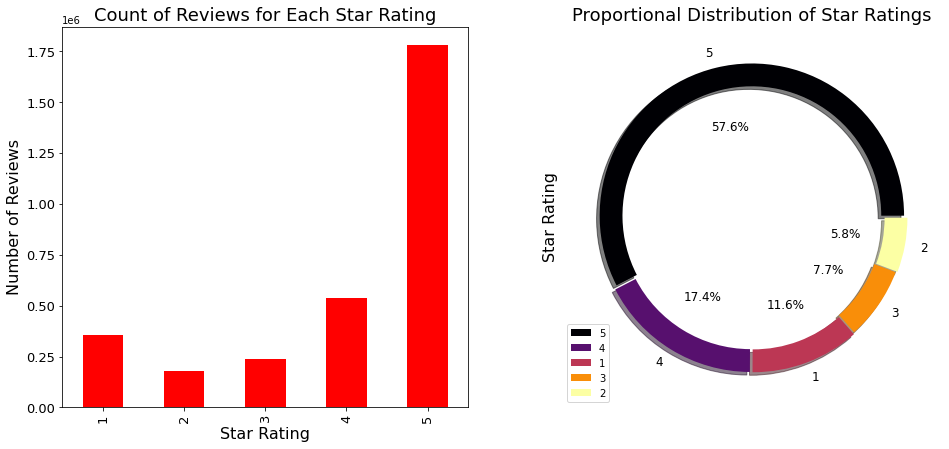

In [ ]:
# Plotting the Count and Proportional Distribution of reviews based on star rating
plt.figure(figsize=(16, 7))
plt.subplot(1, 2, 1)

# Plotting the count of reviews for each star rating
reviews_df['star_rating'].value_counts().sort_index().plot(kind='bar', color='Red', fontsize=13)
plt.xlabel('Star Rating', fontsize=16)
plt.ylabel('Number of Reviews', fontsize=16)
plt.title('Count of Reviews for Each Star Rating', fontsize=18)

plt.subplot(1, 2, 2)

# Plotting the proportional distribution of star ratings
reviews_df['star_rating'].value_counts().plot(kind='pie', autopct='%1.1f%%', explode=(0.01, 0.02, 0.02, 0.01, 0.02), 
                                              fontsize=12, wedgeprops=dict(width=0.15), 
                                              shadow=True, startangle=0, cmap='inferno', legend=True)
plt.ylabel('Star Rating', fontsize=16)
plt.title('Proportional Distribution of Star Ratings', fontsize=18)

**Observations:**

- We can observe that most of the reviews have a **5 star rating** with a **57.6%** share of all the reviews.

- It is followed by 4 stars, then 1 star, 3 stars, and then 2 stars.

- **2 star rating** has the **least share** of the reviews with just **5.8%** reviews having this rating.

- This tells us that most of the people **usually** *leave a 5 star review* for the product they have bought and **less frequently** will *leave a low star review*.

### **Question 2: How are the Polarity values distributed for the Reviews?** 

Text(0.5, 1.0, 'Distribution of Polarity Values')

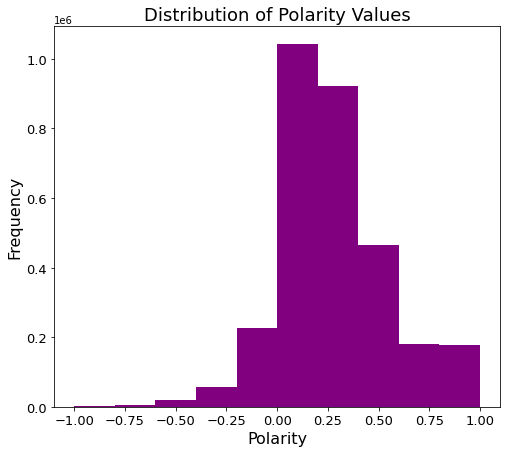

In [ ]:
plt.figure(figsize=(8, 7))
reviews_df['polarity'].plot(kind='hist', color='Purple', fontsize=13)
plt.xlabel('Polarity', fontsize=16)
plt.ylabel('Frequency', fontsize=16)
plt.title('Distribution of Polarity Values', fontsize=18)

**Observations:**

- **Most** of the **polarity values** are **greater than 0**, and only a small proportion of values have a polarity less than 0.

- It is evident that **most reviews** have a **positive sentiment** based on the polarity values.

- The *polarity values* follow a **similar trend** as the *star rating*, as most of the reviews having a 5 star rating, which should usually mean a positive sentiment. 

### **Question 3: How are the Reviews distributed into Sentiments based on Polarity?** 

- Reviews having:
  - a **negative polarity** will have a **negative sentiment**,
  
  - **zero** polarity will have a **neutral sentiment**, and
  
  - **positive** polarity will have a **positive sentiment**.

In [ ]:
print('Reviews with Negative Sentiment based on Polarity:', len(reviews_df[reviews_df['polarity'] < 0]))
print('Reviews with Neutral Sentiment based on Polarity:', len(reviews_df[reviews_df['polarity'] == 0]))
print('Reviews with Positive Sentiment based on Polarity:', len(reviews_df[reviews_df['polarity'] > 0]))

Reviews with Negative Sentiment based on Polarity: 311344
Reviews with Neutral Sentiment based on Polarity: 190167
Reviews with Positive Sentiment based on Polarity: 2592358


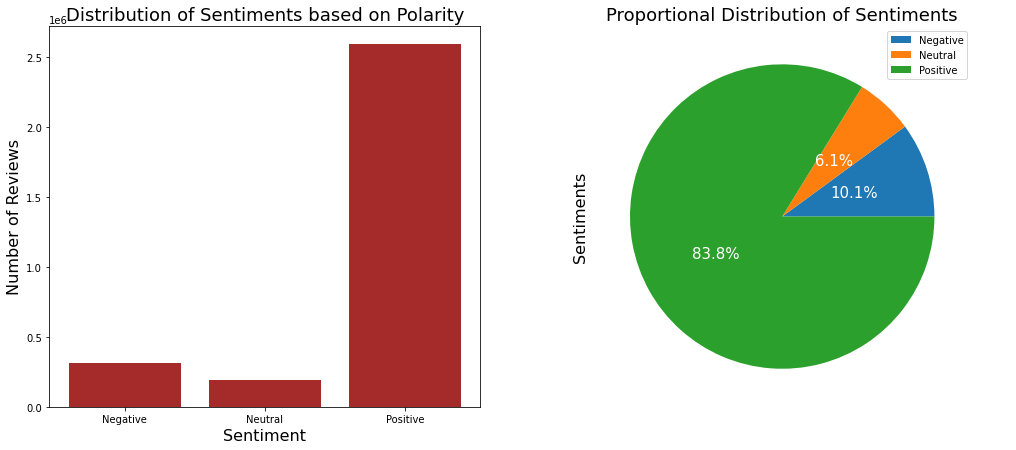

In [ ]:
# Plotting the Count and Proportional Distribution of reviews based on sentiment as per polarity
plt.figure(figsize=(17, 7))
plt.subplot(1, 2, 1)

# Plotting the count of reviews for each sentiment
plt.bar(['Negative', 'Neutral', 'Positive'], [len(reviews_df[reviews_df['polarity'] < 0]), len(reviews_df[reviews_df['polarity'] == 0]), 
                                              len(reviews_df[reviews_df['polarity'] > 0])], color='brown')
plt.xlabel('Sentiment', fontsize=16)
plt.ylabel('Number of Reviews', fontsize=16)
plt.title('Distribution of Sentiments based on Polarity', fontsize=18)

plt.subplot(1, 2, 2)

# Plotting the proportional distribution of sentiments
plt.pie(x=[len(reviews_df[reviews_df['polarity'] < 0]), len(reviews_df[reviews_df['polarity'] == 0]),
           len(reviews_df[reviews_df['polarity'] > 0])], 
        labels=['Negative', 'Neutral', 'Positive'], autopct='%1.1f%%', pctdistance=0.5,
        textprops={'fontsize':15, 'color':'white'})
plt.ylabel('Sentiments', fontsize=16)
plt.title('Proportional Distribution of Sentiments', fontsize=18)
plt.legend()

**Observations:**

- Based on the polarity values, **83.8% reviews** have a **positive sentiment**.

- Only **10.1%** reviews have a **negative** sentiment and **6.1%** reviews have a **neutral** sentiment.

### **Question 4: What is the Relationship between the Star Ratings and the Polarity of the Reviews?** 

Text(0.5, 1.0, 'Relationship Between the Star Rating and Polarity of Reviews')

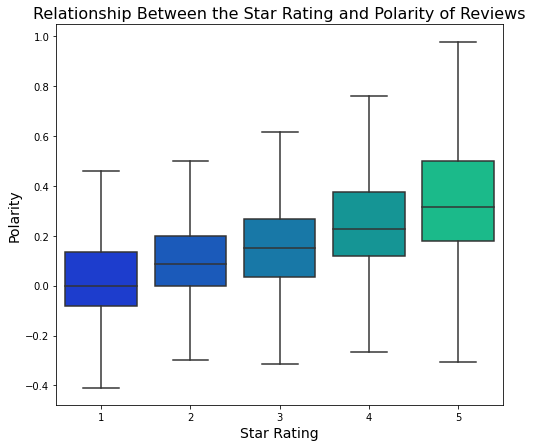

In [ ]:
plt.figure(figsize=(8, 7))
sns.boxplot(data=reviews_df, x='star_rating', y='polarity', palette='winter', width=0.8, showfliers=False)
plt.xlabel('Star Rating', fontsize=14)
plt.ylabel('Polarity', fontsize=14)
plt.title('Relationship Between the Star Rating and Polarity of Reviews', fontsize=16)

**Observations:**

- From the boxplot, we can infer that as the **star rating increases** the **highest polarity** value is also **increasing**.

- This **doesn't prove** that there is any *positive correlation* between the two features.

- Also, *even at 4 and 5 star ratings* the box plot is showing reviews with **negative polarity** or negative **sentiment**.

  - And there is **positive polarity** at *1 and 2 star ratings*.

- We need to **investigate** this in-depth.

### **Question 5: Is there a Positive Correlation between the Star Ratings and the Polarity of Reviews?** 

In [ ]:
reviews_df[['star_rating', 'polarity']].corr()

,star_rating,polarity
star_rating,1.0000,0.4467
polarity,0.4467,1.0000


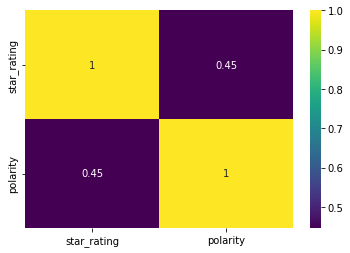

In [ ]:
plt.figure(figsize=(6, 4))
sns.heatmap(reviews_df[['star_rating', 'polarity']].corr(), annot=True, cmap='viridis')

**Observations:**

- `star_rating` and `polarity` have a **positive correlation** of **0.45**

- This **isn't a strong positive correlation**, but is a positive correlation nonetheless.

### **Question 6: Why the Boxplot was showing Negative Polarity for High Star Rated Reviews?** 

- Showing some reviews having **maximum negative polarity** at **-1**.

In [ ]:
for review in reviews_df[reviews_df['polarity'] == -1]['clean_reviews'][:5]:
    print(review, '\n')

horrible 

worst product i have ever purchased blew as soon as i connected to the wall socket 

terrible that is all 

terrible charger will not even charge after one day of being plugged in to wall 

you get what you pay for the worst is the display 



- We can clearly observe a **negative sentiment** in these reviews.

- Showing some reviews having a **5 star rating**.

In [ ]:
for review in reviews_df[reviews_df['star_rating'] == 5]['clean_reviews'][10:15]:
    print(review, '\n')

everything i expected for a great price 

love this small speaker with loud volume great for the beach 

works as advertised nothing else to really say about it 

very good especially for notebooks with micro hdmi and you want to connect it to a computer screen 

cannot get any simpler that this and it works just about anywhere you can find a flat lip or side panel ideally the lip should be at least 1 3 8&34 for best stability but i got it to hold decently well on the short lip of my desk top which is just 3 4&34 br br because the front hanger piece can be adjusted to hang parallel or perpendicular or any angle in between to the clamping surface i was able to get the firmest grip on the side of a bookcase my best idea and where i use it now is attached to the arm of my executive style office chair near where it meets the chair back i do not knock it with my arm or elbow as i raise lower turn in my chair it is really a nifty place to stow the headphones within easy reach but not a cumbe

- These reviews are showing a **positive sentiment** as customers are **praising** the products.

- Let's see some examples where both these cases are overlapping i. e. **high star rating** but **low polarity**.

In [ ]:
for review in reviews_df[(reviews_df['star_rating'] == 5) & (reviews_df['polarity'] == -1)]['clean_reviews'][:5]:
    print(review, '\n')

this thing frees you from the oppression of horribly cramped power strips 

these are sturdy and got me through the worst winter of nyc that i can remember 

this is terrible doesnt get any channels 

they work well and you do not get any nasty signal interference with them 

worked well even though the cable was bent against the wall mounted tv terrible placement of the plug on the tv but the cable still worked well 



**Observations:**

- These reviews contain some words like **horrible**, **worst**, **terrible**, **nasty** that are usually linked with a **negative emotion**.

  - As a result, the **polarity** values are **negative**.

  - But these words are used in order to **praise** the product.

- The **star ratings** are **high** because the customers actually are **satisfied** with the product and showing a **positive sentiment** in this context.

### **Question 7: Why the Boxplot was showing Positive Polarity for Low Star Rated Reviews?** 

- Showing some reviews having **maximum positive polarity** at **1**.

In [ ]:
for review in reviews_df[reviews_df['polarity'] == 1]['clean_reviews'][:5]:
    print(review, '\n')

excellent gain in radio frequency reception over the stock antenna that came with the radio 

fits my tv perfectly 

excellent 

excellent for my child is dorm room 

best headphones i have ever had for this price 



- There is a clear **positive sentiment** in these reviews.

- Showing some reviews having a **1 star rating**.

In [ ]:
for review in reviews_df[reviews_df['star_rating'] == 1]['clean_reviews'][10:15]:
    print(review, '\n')

sorry this cable worked for about a week then broke i had ordered others before and same result my fault for thinking things would change thought i had gotten a bad set but that is the rule not the exception i will try the more expensives ones from bose 

i ordered one loved it so i gave the first one to my husband who was traveling for a month and ordered another for myself would not turn on after charging returned for another one same problem grrrrrr 

i was unable to use them because they hurt my ears i used them for a total 30 min and my ears felt like they were bruised 

the turntable do not work correctly it was dragging otherwise the sound and other features worked well 

bought dec 6 2014 and worked great until today now the charger no longer charges and will not power the unit with the battery slide switch in off position checked the charger with a volt meter to be at 12 5 vdc even with a 10 ohm power resistor connected to it which means that the problem is in the max a34 not 

- These reviews are showing a **negative sentiment** as customers are **dissatisfied** with their products.

- Let's see some examples where both these cases are overlapping i. e. **low star rating** but **high polarity**.

In [ ]:
for review in reviews_df[(reviews_df['star_rating'] == 1) & (reviews_df['polarity'] == 1)]['clean_reviews'][:5]:
    print(review, '\n')

not the best sounding amplifier 

it was not the correct unit for the speakers even though i put in the model number and it matched perfectly it did not work 

did not work seller is awesome on service 

not the company but the product worked flawlessly for two weeks brick since then 

not the greatest 



**Observations:**

- All these reviews contains words like **best**, **perfectly**, **awesome**, **flawlessly**, **greatest**, that are used to express **positive emotions**.

  - As a result, the **polarity** values are **positive**.

  - But, there is also a **negation** in most of these reviews, due to which these words are actually expressing **dissatisfaction**.

- The **star ratings** for these reviews are **low** because the customers actually are **complaining** about their products and showing **negative sentiment**.

- This *star rating* and *polarity* **issue** needs to be **resolved** before building the sentiment analysis model.

- We need to consider both these features while applying a sentiment to our reviews.

### **Question 8: How are the Subjectivity values distributed for the Reviews?** 

Text(0.5, 1.0, 'Distribution of Subjectivity Values')

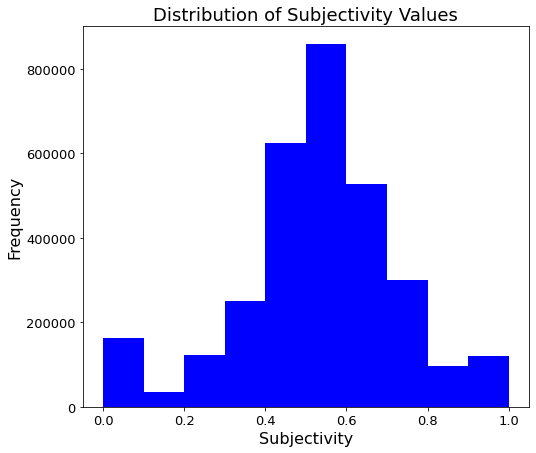

In [ ]:
plt.figure(figsize=(8, 7))
reviews_df['subjectivity'].plot(kind='hist', color='blue', fontsize=13)
plt.xlabel('Subjectivity', fontsize=16)
plt.ylabel('Frequency', fontsize=16)
plt.title('Distribution of Subjectivity Values', fontsize=18)

**Observations:**

- **Subjectivity** values follow a **normal distribution**.

- **More than 80%** values have a *subjectivity* **higher than 0.4**.

- The reviews need to be subjective in order to **build** a **robust** sentiment analysis model.

  - Because *objective reviews* will **downgrade** the **performance** of the model.

### **Question 9: What should be the Threshold of Subjectivity for the Reviews?** 

- We need to **set** a **threshold** for subjectivity that will allow us to **remove reviews** from the dataset having subjectivity lower than the threshold value.

- We will experiment with **3** different `subjectivity` values: **0.1**, **0.2**, and **0.3**

- There are a total of **3093869** reviews in the dataset.

**Reviews having Subjectivity value of 0.1**

In [ ]:
for review in reviews_df[reviews_df['subjectivity'] == 0.1].sample(5, random_state=1)['clean_reviews']:
    print(review, '\n')

maxell once again proved that everything it makes is inferior quality do not buy these my left earbud broke within 20 minutes of use maxell why does everything you make suck so much 

this meter did the job it was intended to do but we really should have purchased a digital satellite finder 

worth ever $ 

i plugged it in and all worked as advertised my samsung blue ray player now talks to my yamaha receiver 

appears to be a grade above hardware store product 



- The reviews are quite **objective** at this point.

In [ ]:
print('Proportion of Reviews left after Subjectivity Threshold set to 0.1:', (len(reviews_df[reviews_df['subjectivity'] >= 0.1])/3093869)*100)

Proportion of Reviews left after Subjectivity Threshold set to 0.1: 94.71444977146739


**Reviews having Subjectivity value of 0.2**

In [ ]:
for review in reviews_df[reviews_df['subjectivity'] == 0.2].sample(5, random_state=1)['clean_reviews']:
    print(review, '\n')

this hdmi cable worked well with hd digital as well as blu ray dvd is the fit into the receptacle is snug and the cable is flexible 

thanks for the comunication the saler respond to have a contact in all time i i i i i i 

this battery will not hold a charge it is useless 

this product works really well in my truck no bulky at all and it never gets tangled up on anything in my truck 

i bought it for the auto reverse feature and used it as a source in transferring my cassettes to mp3 about 20 tapes in it stopped working so i dug in and fixed the drive belt inside and lost the auto reverse capability that was olkay but then the tapes started speeding up during play and i could not control that so i tossed the unit a lesson learned i think i need a tape deck instead 



- The **ojectivity** of reviews has **decreased** and sentiment analysis might be easy for human eye.

- But, it will still be **difficult** for a *machine* to **anlyze** the *sentiment* of these reviews at this point.

In [ ]:
print('Proportion of Reviews left after Subjectivity Threshold set to 0.2:', (len(reviews_df[reviews_df['subjectivity'] >= 0.2])/3093869)*100)

Proportion of Reviews left after Subjectivity Threshold set to 0.2: 93.61304567194021


**Reviews having Subjectivity value of 0.3**

In [ ]:
for review in reviews_df[reviews_df['subjectivity'] == 0.3].sample(5, random_state=1)['clean_reviews']:
    print(review, '\n')

it does its job one cannot complain mike the owner was very curtious in answering my inquiries when contacting via phone 

works very well 

the best i have ever owned 

maxell are the best 

works well with a low price 



- The reviews seem to be much **clearer** and **subjective** now.

In [ ]:
print('Proportion of Reviews left after Subjectivity Threshold set to 0.3:', (len(reviews_df[reviews_df['subjectivity'] >= 0.3])/3093869)*100)

Proportion of Reviews left after Subjectivity Threshold set to 0.3: 90.45854882672796


**Observations:**

- Out of the 3 subjectivity values, we get the **best results** when *subjectivity threshold* is set to **0.3**

- The reviews are **subjective** and it is **easy** to **analyze** their *sentiment* as well.

- Also, we will still have about **90%** of the reviews from the dataset, when we set the subjectivity threshold to 0.3

### **Question 10: What are the Most Common Words in Positive Reviews?** 

- For **positive** reviews, we are setting `star_rating` to **5** and `polarity` to **1**.

In [ ]:
wordcloud = WordCloud(width=2500, height=2000, max_words=50,
                      background_color='White'
                      ).generate(str(reviews_df[(reviews_df['star_rating'] == 5) &
                                 (reviews_df['polarity'] == 1)].sample(10000, random_state=0)['clean_reviews']))

(-0.5, 2499.5, 1999.5, -0.5)

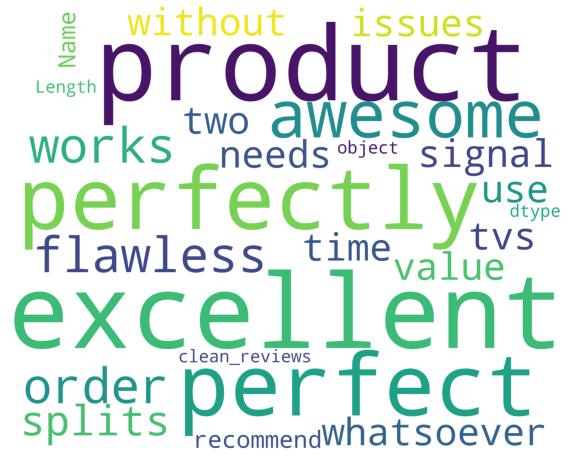

In [ ]:
plt.figure(figsize=(10, 10))
plt.imshow(wordcloud)
plt.axis('off')

**Observations:**

- The most common words in the positive reviews are **perfect**, **awesome**, **perfectly**, **excellent**, etc.

- These words are usually used to indicate a **positive sentiment**.

### **Question 11: What are the Most Common Words in Neutral Reviews?** 

- For **neutral** reviews, we are setting `star_rating` to **3** and `polarity` to **0**.

In [ ]:
wordcloud = WordCloud(width=2500, height=2000, max_words=50,
                      background_color='White'
                      ).generate(str(reviews_df[(reviews_df['star_rating'] == 3) &
                                 (reviews_df['polarity'] == 0)].sample(10000, random_state=0)['clean_reviews']))

(-0.5, 2499.5, 1999.5, -0.5)

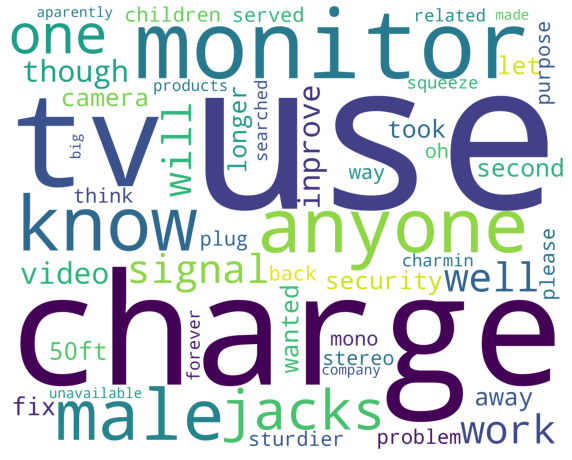

In [ ]:
plt.figure(figsize=(10, 10))
plt.imshow(wordcloud)
plt.axis('off')

**Observations:**

- The *most common words for neutral reviews* are **charge**, **use**, **monitor**, **anyone**, etc.

- These words **don't express** a **clear sentiment** and hence are appropriate for neutral reviews.

### **Question 12: What are the Most Common Words in Negative Reviews?** 

- For **negative** reviews, we are setting `star_rating` to **1** and `polarity` to **-1**.

In [ ]:
wordcloud = WordCloud(width=2500, height=2000, max_words=50,
                      background_color='White'
                      ).generate(str(reviews_df[(reviews_df['star_rating'] == 1) &
                                 (reviews_df['polarity'] == -1)]['clean_reviews']))

(-0.5, 2499.5, 1999.5, -0.5)

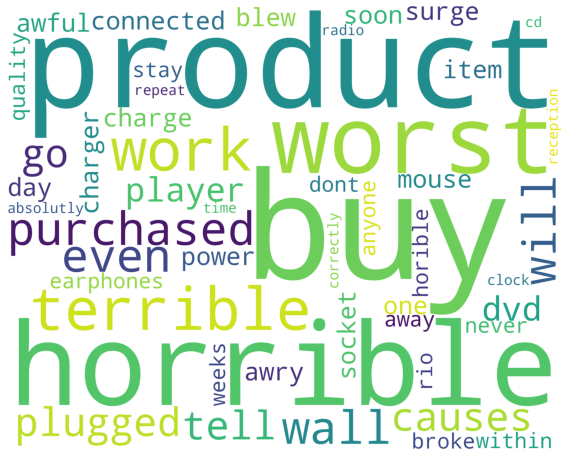

In [ ]:
plt.figure(figsize=(10, 10))
plt.imshow(wordcloud)
plt.axis('off')

**Observations:**

- The most common words for negative reviews are **horrible**, **worst**, **terrible**, **awful**, **broke**, etc.

- These words **clearly express** a **negative emotion** and are appropriate for negative reviews.

### **Question 13: What are the Most Common Words used in the Most Reviewed Product?** 

In [ ]:
reviews_df['product_id'].value_counts()[:5]

B003L1ZYYM    15348
B0002L5R78    11168
B003EM8008     9780
B0012S4APK     9365
B0001FTVEK     8799
Name: product_id, dtype: int64

- **B003L1ZYYM** is the **most reviewed** product with **15348** reviews.

- It is an **AmazonBasics High-Speed HDMI Cable**.

In [ ]:
wordcloud = WordCloud(width=2500, height=2000, max_words=50,
                      background_color='White'
                      ).generate(str(reviews_df[reviews_df['product_id'] == 'B003L1ZYYM']['clean_reviews']))

(-0.5, 2499.5, 1999.5, -0.5)

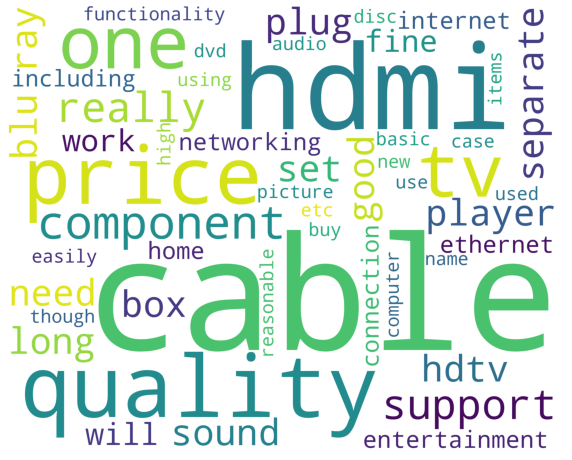

In [ ]:
plt.figure(figsize=(10, 10))
plt.imshow(wordcloud)
plt.axis('off')

**Observations:**

- The most common words for this product are **cable**, **hdmi**, **quality**, **tv**, **good**, **player**.

- Since this product is a **HDMI Cable**, these words **correctly describe** this product.

- There aren't any negative words about the product, instead a **few positive word**s are present.

- But, we **can't infer** the **sentiment** around this product from these words only.

### **Question 14: What are the Most Common Words used by the Customer having Most Reviews?** 

In [ ]:
reviews_df['customer_id'].value_counts()[:5]

49266466    234
53075795    200
30669680    190
53037408    180
50820654    171
Name: customer_id, dtype: int64

- Customer **49266466** has submitted the **highest number of reviews** in total.

In [ ]:
wordcloud = WordCloud(width=2500, height=2000, max_words=50,
                      background_color='White'
                      ).generate(str(reviews_df[reviews_df['customer_id'] == 49266466]['clean_reviews']))

(-0.5, 2499.5, 1999.5, -0.5)

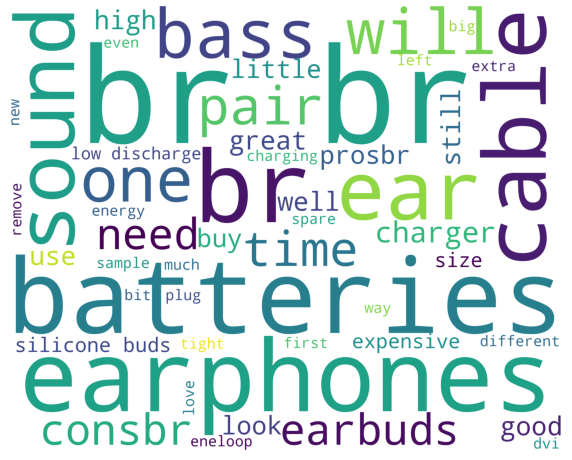

In [ ]:
plt.figure(figsize=(10, 10))
plt.imshow(wordcloud)
plt.axis('off')

**Observations:**

- The most common words used by this customer are **batteries**, **earbuds**, **earphones**, **sound**, **bass**, **ear**, **buds**, **great**, **good** etc.

- These words are mostly associated with *portable sound producing equipments* like **headphones**, **earphones** etc.

- This means that this customer is an **audiophile** and has bought a lot of such products.

- This type of study can help us in **recommending products** to this customer *based on his previous reviews*.

- We can also sense some **positive sentiment** around the products this customer has bought from these words.

This **concludes** our Exploratory Data Analysis.

Now, we will get our dataset ready for **fitting** into Machine Learning Models.

<a id = Section7></a>
## **7. Post Data Processing & Analysis**

- After completing the analysis on the data, we can move on towards fitting our Machine Learning models with our data.

- But, our dataset still contains a lot of **redundant columns** in our data which won't help the model in making predictions.

- Also, we need to **remove samples** having **subjectivity lower than** the *subjectivity threshold* value of **0.3**

- And, we need to create a `sentiment` column containing the **labels** for our machine learning model.

- In this section, we will **remove** all the redundant columns, **drop samples** that doesn't satisfy our selection criteria, and then **create** a `sentiment` column.

- We will also be **splitting** the data into two subsets for training and testing purposes.

<a id = Section701></a>
### **7.1 Removing Redundant Columns**

- We will **remove** every **redundant column** from our dataset.

- We will create a **new dataframe** containing only the **essential features** and use this dataframe down the line.

In [ ]:
# Removing redundant columns from reviews_df
essential_df = reviews_df[['star_rating', 'clean_reviews', 'polarity', 'subjectivity']]
essential_df.head()

,star_rating,clean_reviews,polarity,subjectivity
0,5,as described,0.0000,0.000
1,5,it works as advertising,0.0000,0.000
2,5,works pissa,0.0000,0.000
3,1,did not work at all,0.0000,0.000
4,5,works well bass is somewhat lacking but is present overall pleased with the item,0.0875,0.375


- The **new dataframe** only contains the **essential** features: `star_rating`, `clean_reviews`, `polarity`, `subjectivity`.

<a id = Section702></a>
### **7.2 Removing Samples Having Subjectivity Less Than 0.3**

- Here, we will **remove** the **samples** having **subjectivity lower than** the subjectivity threshold value of **0.3**

In [ ]:
# Checking the current minimum value of subjectivity
essential_df['subjectivity'].min()

0.0

In [ ]:
essential_df = essential_df[essential_df['subjectivity'] >= 0.3]

In [ ]:
# Checking the minimum value of subjectivity after removing samples
essential_df['subjectivity'].min()

0.3

- The **minimun value** of **subjectivity** has increased from 0 to **0.3**

- We have successfully **removed** every **sample** having *subjectivity less than 0.3*

<a id = Section703></a>
### **7.3 Creating Sentiment Column**

- Now, we will create a `sentiment` column which will provide the labels for our training samples used in the Machine Learning models.

- We will use both the `star_rating` and `polarity` values to **divide** our reviews into different **sentiments**.

- For **positive** reviews, we are using a `star_rating` **higher than 3** and a `polarity` value **greater than or equal to 0.5**.

- We have to use such a *high value of polarity* due to the **large volume** of *positive reviews*.

- We need to **reduce** the **size** of our **dataset** for training, otherwise our **session will crash**, due to *shortage of RAM*.

In [ ]:
essential_df[(essential_df['star_rating'] > 3) & (essential_df['polarity'] >= 0.5)].head()

,star_rating,clean_reviews,polarity,subjectivity
6,5,wish i could give this product more than five stars lifesaver,0.500,0.5000
7,5,works great,0.800,0.7500
8,4,great sound and compact battery life seems good happy with this product,0.675,0.6875
10,5,alll good,0.700,0.6000
13,5,excellent gain in radio frequency reception over the stock antenna that came with the radio,1.000,1.0000


In [ ]:
positive_df = essential_df[(essential_df['star_rating'] > 3) & (essential_df['polarity'] >= 0.5)]

In [ ]:
positive_df['sentiment'] = 'positive'

In [ ]:
positive_df.head()

,star_rating,clean_reviews,polarity,subjectivity,sentiment
6,5,wish i could give this product more than five stars lifesaver,0.500,0.5000,positive
7,5,works great,0.800,0.7500,positive
8,4,great sound and compact battery life seems good happy with this product,0.675,0.6875,positive
10,5,alll good,0.700,0.6000,positive
13,5,excellent gain in radio frequency reception over the stock antenna that came with the radio,1.000,1.0000,positive


- For **neutral** reviews, we are using a `star_rating` **equal to 3** and a `polarity` value **between -0.1 and 0.1**.

In [ ]:
essential_df[(essential_df['star_rating'] == 3) & (essential_df['polarity'] >= -0.1) & (essential_df['polarity'] <= 0.1)].head()

,star_rating,clean_reviews,polarity,subjectivity
120,3,these do not hold as long of a charge as the green capped compeditors even though the mw hr is advertised to be higher however these do work as batteries and will hold a wouldecent charge however the charge is shorter lived than other batteries of the same type i have tried i do use these often also these did fry one of my usb ports so use only in outlet usb ports,-0.0208,0.4500
147,3,i bought this to replace a lost neoprene case for my qc20i earbuds this case is just ok br br it seems very cheaply made and it is kind of hard to use because the zipper is a little stiff if it was more expensive i would have returned it but there is really no point i would get a buck or two back after return shipping,0.0827,0.5252
186,3,product is just okay volume level is not very good i am used to going louder charge only lasts for maybe 2 5 hours of continuous use this is my first pair of bluetooth earbuds i feel gullible because i was going to purchase a pair for around 20$ and i thought the price point was too low so instead i purchased these i think maybe for a tryout pair i could have gone with the 20$ pair,0.0962,0.5190
206,3,well i purchased this masione® surge protector strip 2500w 6 outlet black power socket with lightningproof last week and since it arrived it has changed names and has changed the description now not mentioning surge protection i am not sure if my computer and $200 router are safe with this outlet strip it provides power and is compact i chose it for its straight plug which was needed to go into a recessed floor outlet but wanted something that had surge protection because of its use under my desk,0.0567,0.4578
217,3,i bought these as a gift so i never wore them but they looked a little flimsy to me i would not personally buy them for myself,-0.0938,0.4000


In [ ]:
neutral_df = essential_df[(essential_df['star_rating'] == 3) & (essential_df['polarity'] >= -0.1) & (essential_df['polarity'] <= 0.1)]

In [ ]:
neutral_df['sentiment'] = 'neutral'

In [ ]:
neutral_df.head()

,star_rating,clean_reviews,polarity,subjectivity,sentiment
120,3,these do not hold as long of a charge as the green capped compeditors even though the mw hr is advertised to be higher however these do work as batteries and will hold a wouldecent charge however the charge is shorter lived than other batteries of the same type i have tried i do use these often also these did fry one of my usb ports so use only in outlet usb ports,-0.0208,0.4500,neutral
147,3,i bought this to replace a lost neoprene case for my qc20i earbuds this case is just ok br br it seems very cheaply made and it is kind of hard to use because the zipper is a little stiff if it was more expensive i would have returned it but there is really no point i would get a buck or two back after return shipping,0.0827,0.5252,neutral
186,3,product is just okay volume level is not very good i am used to going louder charge only lasts for maybe 2 5 hours of continuous use this is my first pair of bluetooth earbuds i feel gullible because i was going to purchase a pair for around 20$ and i thought the price point was too low so instead i purchased these i think maybe for a tryout pair i could have gone with the 20$ pair,0.0962,0.5190,neutral
206,3,well i purchased this masione® surge protector strip 2500w 6 outlet black power socket with lightningproof last week and since it arrived it has changed names and has changed the description now not mentioning surge protection i am not sure if my computer and $200 router are safe with this outlet strip it provides power and is compact i chose it for its straight plug which was needed to go into a recessed floor outlet but wanted something that had surge protection because of its use under my desk,0.0567,0.4578,neutral
217,3,i bought these as a gift so i never wore them but they looked a little flimsy to me i would not personally buy them for myself,-0.0938,0.4000,neutral


- For **negative** reviews, we are using a `star_rating` **less than 3** and a `polarity` value **less than 0**.

In [ ]:
essential_df[(essential_df['star_rating'] < 3) & (essential_df['polarity'] < 0)].head()

,star_rating,clean_reviews,polarity,subjectivity
49,2,horrible,-1.0000,1.0000
75,1,day 20 november 2014 acquired the jbl portable load indoor outdoor bluetooth speaker black and hardly used it and 6 16 15 she has stopped working just take full charge when left more than 24 hours yet their working time is no more than 2hs the few times i used was always loaded with accessories that accompanied it i live in brasilia df brazil not with the product warranty or aq even there in the usa she when turned on provides a noise as if in short circuit and after a while for the noise only is working connected to the charger br it is expensive and that left me high and dry br disappointed,-0.0719,0.4677
90,1,sorry this cable worked for about a week then broke i had ordered others before and same result my fault for thinking things would change thought i had gotten a bad set but that is the rule not the exception i will try the more expensives ones from bose,-0.1750,0.5729
98,1,i was unable to use them because they hurt my ears i used them for a total 30 min and my ears felt like they were bruised,-0.2500,0.6250
118,2,too expensive & reception is not great a $10 antenna does the same job,-0.3000,0.5250


In [ ]:
negative_df = essential_df[(essential_df['star_rating'] < 3) & (essential_df['polarity'] < 0)]

In [ ]:
negative_df['sentiment'] = 'negative'

In [ ]:
negative_df.head()

,star_rating,clean_reviews,polarity,subjectivity,sentiment
49,2,horrible,-1.0000,1.0000,negative
75,1,day 20 november 2014 acquired the jbl portable load indoor outdoor bluetooth speaker black and hardly used it and 6 16 15 she has stopped working just take full charge when left more than 24 hours yet their working time is no more than 2hs the few times i used was always loaded with accessories that accompanied it i live in brasilia df brazil not with the product warranty or aq even there in the usa she when turned on provides a noise as if in short circuit and after a while for the noise only is working connected to the charger br it is expensive and that left me high and dry br disappointed,-0.0719,0.4677,negative
90,1,sorry this cable worked for about a week then broke i had ordered others before and same result my fault for thinking things would change thought i had gotten a bad set but that is the rule not the exception i will try the more expensives ones from bose,-0.1750,0.5729,negative
98,1,i was unable to use them because they hurt my ears i used them for a total 30 min and my ears felt like they were bruised,-0.2500,0.6250,negative
118,2,too expensive & reception is not great a $10 antenna does the same job,-0.3000,0.5250,negative


- **Joining** all **3** dataframes to create our final dataset.

In [ ]:
sentiment_df = pd.concat([positive_df, neutral_df, negative_df], ignore_index=True)
sentiment_df.head()

,star_rating,clean_reviews,polarity,subjectivity,sentiment
0,5,wish i could give this product more than five stars lifesaver,0.500,0.5000,positive
1,5,works great,0.800,0.7500,positive
2,4,great sound and compact battery life seems good happy with this product,0.675,0.6875,positive
3,5,alll good,0.700,0.6000,positive
4,5,excellent gain in radio frequency reception over the stock antenna that came with the radio,1.000,1.0000,positive


In [ ]:
sentiment_df.tail()

,star_rating,clean_reviews,polarity,subjectivity,sentiment
762084,2,this antenna when installed outside provided only slight improvement over &quotrabbit ear&quot antenna for local station reception,-0.0417,0.3042,negative
762085,1,although the concept is good diamond has done a poor job of designing the product as well as a poor job of supporting it the volume is too low even at its highest setting the hold switch is poorly designed so that you cannot tell if its engaged the clip holding the battery in is easily broken and the add on 32meg external memory did not work when it arrived overall a very poor job,-0.1170,0.4230,negative
762086,1,it does skip a bunch which makes it difficult to listen to when not stationary,-0.5000,1.0000,negative
762087,2,the sony discman has its benifits but is a bad choice for the long run i have owned two of them in a 9 month period the first failed to play within the first three months and the seconds esp did not work after two months and after 4 more months ceased to play at all,-0.0417,0.4222,negative
762088,1,i agree with some of the above comments esp the first my sony discman was useless after a few months and refused to play even if you just moved in your seat with it on and it would trip out to the beginning of the cd it was replaced and the same happens again now the esp function is the worst available and you can get much better makes for the same priceor less anti shock and durabilty is so important in personal cd players and it is the things that sony have overlooked in this model,-0.0264,0.3542,negative


- The final dataset contains the **selected reviews** along with their respective **sentiments**.

**Proportional Distribution of Sentiments**

Text(0.5, 1.0, 'Proportional Distribution of Sentiments')

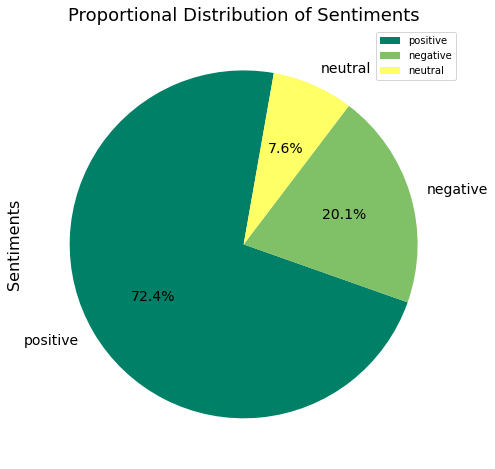

In [ ]:
# Plotting the proportional distribution of sentiments
sentiment_df['sentiment'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=80, figsize=(8, 8),
                                            fontsize=14, legend=True, cmap='summer')
plt.ylabel('Sentiments', fontsize=16)
plt.title('Proportional Distribution of Sentiments', fontsize=18)

**Observations:**

- Our final dataset contains about **72.4% positive** reviews, **20.1% negative** reviews, and **7.6% neutral** reviews.

**Saving the Final Dataset as a CSV File**

- We will **save** our final dataset as a **csv file** in the local system.

- This will allow us to **resume** from this point onwards if we want to make changes to the model building process.

In [ ]:
# Saving the dataframe to a csv file.
sentiment_df.to_csv('review_data.csv', index=False, encoding='utf-8')

In [ ]:
# To load the saved csv file into a dataframe
# sentiment_df = pd.read_csv('review_data.csv')
# sentiment_df.head()

<a id = Section704></a>
### **7.4 Data Splitting**

- Now, we will **split** the dataset into **Train** and **Test** subsets.

- We will use **80%** data for **training** and the remaining **20%** data for **testing** our models.

- First, we will **separate** the **reviews** and their respective sentiment **labels** from the data.

In [ ]:
# Separating the Reviews from the dataset
X = sentiment_df['clean_reviews'].values
X[:5]

array(['wish i could give this product more than five stars lifesaver',
       'works great',
       'great sound and compact battery life seems good happy with this product',
       'alll good',
       'excellent gain in radio frequency reception over the stock antenna that came with the radio'],
      dtype=object)

In [ ]:
# Separating the labels
y = sentiment_df['sentiment'].values
y[:5]

array(['positive', 'positive', 'positive', 'positive', 'positive'],
      dtype=object)

- After **separating** the *reviews* and *labels*, we will **split** the data into **train** and **test sets**.

In [ ]:
# Using scikit-learn's train_test_split function to split the dataset into train and test sets.
# 80% of the data will be in the train set and 20% in the test set, as specified by test_size=0.2
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Checking the shapes of the training and test sets.
print('Training Data Shape:', X_train.shape, y_train.shape)
print('Testing Data Shape:', X_test.shape, y_test.shape)

Training Data Shape: (609671,) (609671,)
Testing Data Shape: (152418,) (152418,)


- The data has been **divided** into training and test sets.

<a id = Section8></a>
## **8. Model Development & Evaluation**

- In this section, we will be **building** our Machine Learning models and fitting them with the training data.

<a id = Section801></a>
### **8.1 Building Machine Learning Model**

- Building a `tokenizer` function that will **split** each review into a **list of tokens**.

- A **token** is a **single word** in this case, and the review will be splitted on a **single white space**.

In [ ]:
def tokenizer(text):
    return text.split()

- Building a **TFIDF Vectorizer**.

- In this, first we create a **vocabulary** of **unique tokens** from the entire set of **documents** (i. e. **reviews**).

- Then we construct a **feature vector** from each document that contains the **term frequency** of how often each word occurs in a particular document.

- Term Frequency is the **number of times** a term, **t**, **occurs** in a document, **d**.

- TFIDF stands for **term frequency-inverse document frequency** (tf-idf).

  - It is used to **downweight** the **frequently occurring words** in the feature vectors that typically don't contain useful or discriminatory information.


  - $tf-idf(t, d) = tf(t, d) * idf(t, d)$

    - Here, $tf(t, d)$ is the **term frequency**, and

    - $idf(t, d)$ is the **inverse document frequency**

<br> 

  - $idf(t, d) = log(n_d / ( 1+ df(d, t))$

    - Here, $n_d$ is the **total number of documents**, and
    
    - $df(d, t)$ is the **number of documents**, d, that **contain** the **term t**.

- This will create a matrix of **15000** most common words, based on their term frequency in the data, as the **columns**.

In [ ]:
tfidf = TfidfVectorizer(max_features=15000, tokenizer=tokenizer)

- Creating a **Machine Learning Pipeline**.

- This will first, **vectorize** the data, creating a **TFIDF feature matrix** from the dataset, then will **pass** this **data** to our **classifier**.

- The classifier in this case is the **Multinomial Naive Bayes** classifier.

- This algorithm is **most suited** for **vectorized text** that contains a *large number of features*.

- Creating a pipeline allows us to **streamline** our Machine Learning workflow by performing **multiple steps** in a single pass.

In [ ]:
tfidf_mnb = Pipeline([('vect', tfidf), ('clf', MultinomialNB())])

- **Fitting** our **pipeline** with the training data.

In [ ]:
tfidf_mnb.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('vect',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=15000,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=<function tokenizer at 0x7f402feb23b0>,
                                 use_idf=True, vocabulary=None)),
                ('clf',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

**Making Predictions on Test Set**

In [ ]:
y_pred = tfidf_mnb.predict(X_test)

In [ ]:
y_pred[:5]

array(['positive', 'positive', 'positive', 'negative', 'positive'],
      dtype='<U8')

**Model Evaluation**

- Checking the model **accuracy** on both train and test sets.

- We are using the **classifier**'s `score` method, which calculates the **accuracy score** of the model on a given data.

In [ ]:
print('Model Accuracy for the Train set:', tfidf_mnb.score(X_train, y_train))

Model Accuracy for the Train set: 0.927186958211888


In [ ]:
print('Model Accuracy for the Test set:', tfidf_mnb.score(X_test, y_test))

Model Accuracy for the Test set: 0.9233161437625478


**Observations:**

- We get an **accuracy** of about **92%** on both of our train set and test set.

- This implies that our model is **not overfitting**.

- It is **generalizing** well on unseen data, and giving good results.

- Creating **confusion matrix** and **classification report** of our predictions.

In [ ]:
pd.DataFrame(confusion_matrix(y_test, y_pred), columns=['negative', 'neutral', 'positive'], index=['negative', 'neutral', 'positive'])

,negative,neutral,positive
negative,27947,784,1726
neutral,6975,3195,1457
positive,648,98,109588


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    negative       0.79      0.92      0.85     30457
     neutral       0.78      0.27      0.41     11627
    positive       0.97      0.99      0.98    110334

    accuracy                           0.92    152418
   macro avg       0.85      0.73      0.75    152418
weighted avg       0.92      0.92      0.91    152418



- Our model is giving **great** results for the **positive** sentiment.
  
  - This might be due to the **large proportion** of *positive reviews* in the dataset.

- The performace for **negative** reviews is also **good** with a **F1 score** of **85%**.

- But, our model **struggles** while predicting the *neutral sentiment*.

  - This is due to the fact the many neutral sentiment reviews contains **words** which can sometimes be **associated** with both *positive and negative reviews*.

  - Also, there are a lot **less** number of **neutral reviews** in the data.

  - And, hence leads to a lot of **false negatives** in the neutral sentiment.

- Creating a dataframe containing the **test set reviews** and **sentiments**, along with the **predictions** made by the model for comparison.

In [ ]:
evaluation_df = pd.DataFrame({'reviews': X_test, 'sentiment': y_test, 'sentiment_tfidf_mnb': y_pred})
evaluation_df.head()

,reviews,sentiment,sentiment_tfidf_mnb
0,replacement pads for my sony headphones work perfect wish they still made this model of earhphones,positive,positive
1,perfect fit,positive,positive
2,i do a lot of printing and the oem cartridges are getting out of sight this fits the bill and i am happy with it is results,positive,positive
3,i am not sure what happened but i never rec would the product i ordered or i should say i was out of town for a week but if one of my neighbors picked it up i would have gotten it,negative,negative
4,works great i used this to run my satellite to my projector,positive,positive


**Observations:**

- The sentiments we gave to the reviews were based on **star ratings** and the **polarity** value calculating TextBlob's sentiment analysis function.

- Now, we can **visually compare** the sentiment **predictions** made by our model on these reviews.

<a id = Section802></a>
### **8.2 Using Pre-Trained Model**

- We went to all the trouble of **calculating polarity**, **subjectivity** values for our reviews.

- Then we **divided** the **reviews** into **sentiments** based on some conditions.

- After that, we created a **TFIDF feature matrix** and **trained** a machine learning **model** to **predict** the **sentiment** of the reviews.

- It was a very **time consuming** process.

- But, what if we can **skip** all these steps and make **accurate predictions** without wasting any time.

**Enters Transfer Learning**

- **Transfer learning** is the process of **storing knowledge** gained while solving **one problem** and **applying** it to a **different** but **related problem**.

- For example, **knowledge gained** while learning to *recognize cars* could **apply** when trying to *recognize trucks*.

**NaiveBayesAnalyzer**

- `NaiveBayesAnalyzer` of **textblob** library is an **NLTK** classifier trained on a **movie reviews** corpus.

- We just need to **pass** the **review** and it will **predict** the **sentiment** present in it.

- It returns its result as a named tuple of the form: **Sentiment(classification, p_pos, p_neg)**.

In [ ]:
review = 'awsome fits really well & is very sturdy provides excellent protection at a great price'
review_blob = TextBlob(review, analyzer=NaiveBayesAnalyzer())
print(review)
print(review_blob.sentiment)

awsome fits really well & is very sturdy provides excellent protection at a great price
Sentiment(classification='pos', p_pos=0.9722662651076647, p_neg=0.027733734892335743)


- It predicts the **sentiment** of the review to be **positive**, which is correct.

- Creating a helper function which will allow us to make predictions on a large number of reviews.

- It will output **positive** if *p_pos is greater than 0.5*, **negative** if **p_pos is less than 0.5**, and **neutral** if *p_pos is equal to 0.5*

In [ ]:
def sentiment(polarity):
    if polarity < 0.5:
        return 'negative'
    elif polarity > 0.5:
        return 'positive'
    else:
        return 'neutral'

**Making sentiment predictions on the test set**

- **NaiveBayesAnalyzer** is **very slow** when compared to scikit-learn's machine learning models.

- Hence, it will take a **large amount of time** to make predictions on the entire dataset.

- So, we will **sample** a **500 reviews** from the evaluation_df, and make predictions on them.

In [ ]:
mini_df = evaluation_df.sample(500, random_state=0)

In [ ]:
%%time
y_pred_nba = []
for review in mini_df['reviews'].values:
    y_pred_nba.append(sentiment(TextBlob(review, analyzer=NaiveBayesAnalyzer()).sentiment.p_pos))

CPU times: user 44min, sys: 59.8 s, total: 45min
Wall time: 45min 20s


In [ ]:
y_pred_nba[:5]

['positive', 'positive', 'positive', 'negative', 'positive']

**Model Evaluation**

- Checking the model **accuracy**.

In [ ]:
print('Model Accuracy for the Test set:', accuracy_score(mini_df['sentiment'], y_pred_nba))

Model Accuracy for the Test set: 0.702


**Observations:**

- We get an **accuracy** of about **70%** on our **500** reviews.

- Creating **confusion matrix** and **classification report** of our predictions.

In [ ]:
pd.DataFrame(confusion_matrix(mini_df['sentiment'], y_pred_nba),
             columns=['negative', 'neutral', 'positive'],
             index=['negative', 'neutral', 'positive'])

,negative,neutral,positive
negative,65,0,47
neutral,11,0,35
positive,54,2,286


In [ ]:
print(classification_report(mini_df['sentiment'], y_pred_nba))

              precision    recall  f1-score   support

    negative       0.50      0.58      0.54       112
     neutral       0.00      0.00      0.00        46
    positive       0.78      0.84      0.81       342

    accuracy                           0.70       500
   macro avg       0.43      0.47      0.45       500
weighted avg       0.64      0.70      0.67       500



**Observations:**

- The pre-trained model is only good at making predictions about the positive sentiments.

- Also, it must have been trained on a data containing only positive and negative sentiments.
  
  - That's why it is unable to make predictions about the neutral sentiment.

In [ ]:
mini_df['sentiment_nba'] = y_pred_nba
mini_df.head()

,reviews,sentiment,sentiment_tfidf_mnb,sentiment_nba
37607,i am giving it three stars for the following reasons product advertising was misleading i did not know the headphones came with two plugs so i had to spend extra money to buy another plug to connect the headphone to my ipod quality of sound is ok cables are a bit thin pros cables are long,neutral,negative,positive
140648,i was very disappointed as i was sent the wrong item and it was not my time to return it,negative,negative,positive
89950,i used one of this sets a year ago with great results i decided to get another set mainly because right now they are about half of what a paid before the disc came in on time and well package but the first 2 copies were not readable in my toshiba player i tried in a friend house and it worked so after some research i noticed the version model code i received were slight different from my prior order br br last year model code vbe260np10v1 vs this year model code vbe260vp10n1br br be careful because they look the same but they are not the same i ordered it from a japanese seller who is using fba,neutral,negative,positive
66588,quality and sound sucks apple headphones are better packaging was really bad mine had scotch tape to hold the headphone wire down very unprofessional do not buy,negative,negative,negative
108815,good product and excellent price value,positive,positive,positive


**Observations:**

- Here we can compare the predictions made by both the models.

- Our TFIDF and Multinomial Naive Bayes model performs really well for this sentiment analysis task.

- It is **fast** and more **accurate** than the pre-trained model.

- The pre-trained model doesn't give very good results on this dataset.

- But, this shouldn't stop us from using **Transfer Learning** and Pre-trained models.

  - They are heavily used in Deep Learning for **Object Detection**, **Image Classification**, **Language Modelling**, etc.

- We should use our **TFIDF - Multinomial Naive Bayes** model as our final model, for making **future predictions**.

<a id = Section9></a>
## **9. Conclusion**

- We cleaned the reviews by:
  - **Changing** the **case** of each word to **lowercase**,
  - **Fixing** certain words,
  - **Removing** all the **punctuation marks** from each review, and
  - **Removing** any additional white space from each review.

- Then, we calculate the **polarity** and **subjectivity** values for each review.

- This allowed us to **analyze** our data **in-depth** to find relationship between various features like star rating and polarity.

- We also calculated a **threshold** for the **subjectivity** value in our reviews.

- We then found out the **most common words** associated with different sentiments.

- After analyzing the data:
  - We **remove** all **redundant columns** from the data,

  - **Remove** all the **samples** having **subjectivity less than 0.3** i. e. the subjectivity threshold.

  - **Divide reviews into sentiments** based on star rating and polarity.

  - At last, we **split** the **data** into training and test sets.

- During model building, we first created a **TFIDF matrix** of our data and **trained** a **Multinomial Naive Bayes** model.

  - This model was then used to make **predictions** on the test set.

  - It achieved an **accuracy** of **92%** on both train and test sets.

  - This implied that model is not overfitting and is **generalizing** well on unseen data.

- At last, we used a **pre-trained** model to make sentiment predictions on a **small sample** of our data.
  
  - The pre-trained model was **slower** than the ML model we build, and gave **worse results**.

- So, we **discarded** this model, and used our **TFIDF - Multinomial NB** model as our **final model**.